<html>
<head>

</head>
<body style="backgroud-color:blue;">
<h2>PyTorch Basics</h2><br> 
Author:  <b>Ayushman Gupta</b>
</body>
</html>

In [240]:
#importing library
import torch
import torch.nn as nn
import torchvision
import torch.utils.data as data_utils
import numpy as np
from PIL import Image as P
import torchvision.transforms as transforms
import pandas as pd
import torchvision.datasets as dset
from torch.utils.data import Dataset
from IPython.core.display import Image, display
import matplotlib.pyplot as plt

### Creating Tensors

In [18]:
x = torch.tensor(1, requires_grad=True)
w = torch.tensor(2, requires_grad=True)
b = torch.tensor(3, requires_grad=True)


In [19]:
# Computational Graph
y = w*x + b

In [20]:
# Compute Gradients
y.backward()

In [21]:
# Printing Gradients
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2)
tensor(1)
tensor(1)


### autograd 

In [121]:
x = torch.rand(10,3)
y = torch.rand(10,2)

### Build FullyConnected Layer

In [122]:
# default bias= True
linear = nn.Linear(3,2)

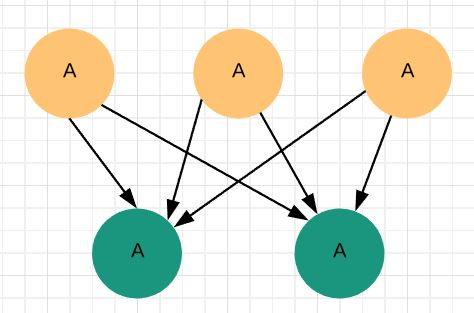

In [123]:
display(Image('linearNode.JPG', width=300, unconfined=True))

In [124]:
linear

Linear(in_features=3, out_features=2, bias=True)

In [125]:
print("weight: ",linear.weight)

weight:  Parameter containing:
tensor([[ 0.5674,  0.1045, -0.1050],
        [ 0.3696,  0.1816, -0.3100]])


In [126]:
print("bias: ",linear.bias)

bias:  Parameter containing:
tensor([-0.2760, -0.4978])


### Build loss and Optimizer

In [127]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=linear.parameters(),lr=.0001)

In [128]:
pred = linear(x)

In [129]:
loss = criterion(pred,y)

In [130]:

print("Loss: {0:.4}".format(loss.item()))

Loss: 0.648


In [131]:
loss.backward()


In [136]:
#printing the gradient

print("dL/dW \n",linear.weight.grad)
print("dL/db \n",linear.bias.grad)

dL/dW 
 tensor([[-11.9486,  -9.7369, -22.5635],
        [-26.7830, -16.9612, -37.9663]])
dL/db 
 tensor([-43.0130, -63.2993])


In [133]:
# Updates the gradient
optimizer.step()

In [134]:
pred = linear(x)
loss = criterion(pred,y)
print("Loss after 1 iteration {0:.4}".format(loss.item()))

Loss after 1 iteration 0.6478


In [ ]:
# loss after 100 step
for i in range(100):
    
    loss.backward()
    optimizer.step()
    pred = linear(x)
    loss = criterion(pred,y)
    print("Loss after n iteration {0:.4}".format(loss.item()))

### Loading data from Numpy Array

In [137]:
x = np.array([[1,2],[3,4]])

In [140]:
y = torch.from_numpy(x)

In [141]:
y.numpy() 

array([[1, 2],
       [3, 4]])

### Create Custom Dataset

In [156]:
df = pd.DataFrame(columns=['image','label'])


In [158]:
df.loc[0] = ['img/c1.jpg',0]
df.loc[1] = ['img/c2.jpg',1]

In [160]:
df.to_csv('cat.csv',header=True)

In [269]:
transform = transforms.Compose([
       
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
trainSet = torchvision.datasets.ImageFolder('img',transform=transform)
trainloader = torch.utils.data.DataLoader(trainSet,batch_size=4,shuffle=True)
classes = ('cats','dogs')

In [270]:
data_iter  = iter(trainloader)

In [242]:
images,labels = data_iter.next()

In [217]:
image

tensor([ 1])

In [198]:
for image,label in trainloader:
    print(image,label)

tensor([[[[ 0.6000,  0.6078,  0.6157,  ...,  0.5765,  0.5725,  0.5725],
          [ 0.6235,  0.6275,  0.6353,  ...,  0.5882,  0.5843,  0.5843],
          [ 0.6431,  0.6471,  0.6549,  ...,  0.5961,  0.5922,  0.5922],
          ...,
          [ 0.6745,  0.6784,  0.6824,  ...,  0.0588,  0.0392,  0.0314],
          [ 0.6588,  0.6667,  0.6706,  ...,  0.0392,  0.0314,  0.0196],
          [ 0.6471,  0.6510,  0.6549,  ...,  0.0275,  0.0196,  0.0235]],

         [[ 0.4706,  0.4784,  0.4863,  ...,  0.4157,  0.4118,  0.4118],
          [ 0.4941,  0.4980,  0.5059,  ...,  0.4275,  0.4235,  0.4235],
          [ 0.5137,  0.5176,  0.5255,  ...,  0.4353,  0.4314,  0.4314],
          ...,
          [ 0.5765,  0.5804,  0.5843,  ...,  0.0627,  0.0431,  0.0353],
          [ 0.5608,  0.5686,  0.5725,  ...,  0.0392,  0.0314,  0.0235],
          [ 0.5490,  0.5529,  0.5569,  ...,  0.0275,  0.0196,  0.0275]],

         [[ 0.3490,  0.3569,  0.3647,  ...,  0.2431,  0.2392,  0.2392],
          [ 0.3725,  0.3765,  

In [263]:
trainloader.batch_sampler.sampler.data_source.samples

[('img\\cat\\c1.jpg', 0),
 ('img\\cat\\c2.jpg', 0),
 ('img\\dog\\d1.jpg', 1),
 ('img\\dog\\d2.jpg', 1),
 ('img\\dog\\d3.jpg', 1)]

In [271]:
def imshow(inp_tensor, title=None):
    """image show for Tensor"""
    img = inp_tensor.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

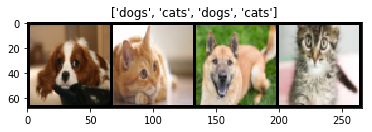

In [272]:
images,labels = data_iter.next()
batch_imgs = torchvision.utils.make_grid(images)
imshow(batch_imgs, title=[classes[x] for x in labels])